In [2]:
import numpy as np
import matplotlib.pyplot as plt

374.99999999999994
58.06451612903225


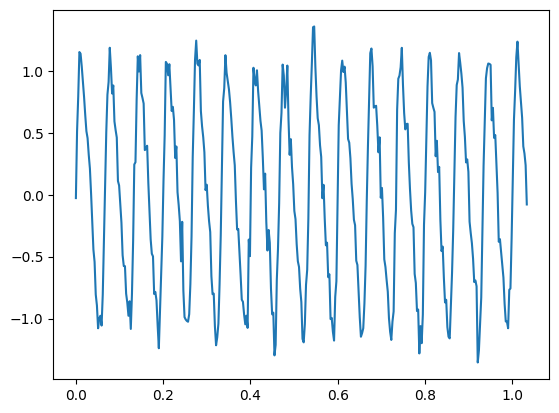

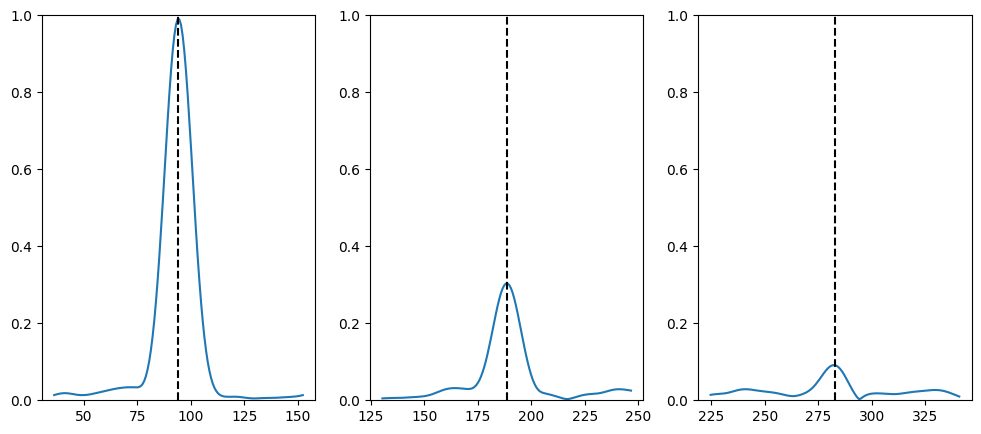

In [11]:
f_base = 15 #Hz
num_cyc = 15.5
samples_per_cyc = 25


w1 = f_base * 2 * np.pi
w2 = 2*w1
w3 = 3*w1


tmax = num_cyc/f_base
sampling_rate = num_cyc * samples_per_cyc / tmax
print(sampling_rate)

N = int(tmax*sampling_rate)
t, dt = np.linspace(0, tmax, N, retstep=True)
t_mid = tmax / 2
t_sig = 0.3*t_mid
window = 2*np.exp(-(t-t_mid)**2 / 2 / t_sig**2) / np.sqrt(2*np.pi) / t_sig
sig_t = np.sin(w1*t) + 0.3*np.sin(w2*t) + 0.1 * np.sin(w3*t) + 0.1*np.random.randn(N)

plt.plot(t, sig_t)
#plt.plot(t, window)


d_w = 10*6/tmax
print(d_w)



fig, ax = plt.subplots(ncols=3, figsize=(12,5))
for i, wc in enumerate([w1, w2, w3]):
    axc = ax[i]
    w_list = np.linspace(wc - d_w, wc+d_w, 150)
    ft_sig = np.asarray([dt*np.sum(window*sig_t * np.exp(1j*wi*t)) for wi in w_list])
    axc.plot(w_list, np.abs(ft_sig))
    axc.axvline(wc, color='k', ls='--')
    axc.set_ylim([0, 1])